### Q1 - Visualização

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import numpy as np
from matplotlib import pyplot as plt
import math
import matplotlib
# import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.offsetbox as offsetbox
%matplotlib inline

plt.style.use('seaborn-dark')
# plt.style.use('default')
FONTSIZE = 13

## Q1
Mude a função seno para cosseno (no exemplo da aula) e verifique qual o grau do polinômio mais adequado para 20 observações (10 no conjunto de teste e 10 no conjunto de treinamento). Considere o código abaixo para gerar os dados.

Escolha uma opção: <br>
a. 8<br>
b. 1<br>
c. 7<br>
d. 3<br>
e. 9


# Parametros para alterar

0
1


In [3]:
# PARAMETROS PODE ALTERAR

# IMPORTANTE
N_train = 10 # 10 | Numero de dados para o treinamento
N_test = 10 # 10 | Numero de dados para o teste
sigma = 0.2 # 0.2 | Ruido

# INTERESSANTE
x_start, x_final = (0, 1) # (0,1) | Intervalo que a função deve seguir

# OPCIONAL
m_options = [1, 3, 7, 8, 9] # [1, 3, 7, 8, 9] | Opções para destacar no gráfico 
m_values = list(range(1,10)) # list(range(1,10)) | lista de M
# "$f(x) = x^{2} + x^{9}$" | É possível usar TeX. Eu estou colocando a função usada

#função para gerar os dados
def function(x):
    y = x**2 + x**9
#     y = np.sin(2 * np.pi * x)
    return y

title_function = "$f(x) = x^{2} + x^{9}$" # Se você fizer uma função distinta pode trocar aqui

# Não modificar
title_helper = f" \tx = [{x_start}, {x_final}]\tN_train = {N_train} \tN_test = {N_test}\tsigma = {sigma}"
title_sub_plots = title_function + title_helper

# Função um pouco modificada que o exercício fornece

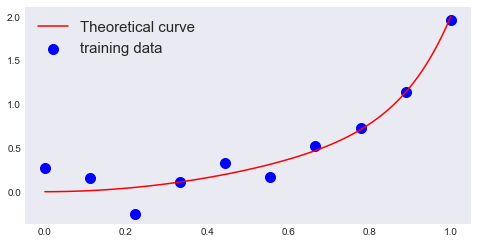

In [6]:
# Copia com pequenas alterações do exercício fornecido pelo professor
np.random.seed(10)

# training set

# Theoretical curves
xt = np.linspace(x_start, x_final,100)
yt = function(xt)


# só para normalizar o sigma para casos que muda o x_final, pois 'estoura'
if (x_start, x_final) == (0, 1):
    df_func = 1
else:
    df_func  = (max(yt) - min(yt))/2
    
x_train =  np.linspace(x_start, x_final, N_train)
y_train = function(x_train) + df_func*np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)

fig = plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", 
            s=100, label="training data")

# test set
x_test = np.linspace(x_start, x_final, N_test)
y_test = function(x_test) +  df_func*np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)

plt.plot(xt,yt, '-r',  label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)
#print(df_func)

# Algumas funções

In [7]:
#Funcao para calcular o erro quadrático médio
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

# Esta função só adiciona os labels da gráfico 
# Malemá deveria ajustar, maaas oportunidade para melhorar ;)
def annotate_plot(ax, x, y):
  
    df_y = 0.015
    df_x = -0.3
    diff = 0
    for i, txt in enumerate(y):
        string = "{:.3f}".format(txt)
        
        if i != 0:
            diff = y[i]-y[i-1]
        string = string + " ($\Delta${:+.3f})".format(diff) 
        color = 'tab:red' if diff > 0 else ('tab:green' if diff < 0 else 'gray')
        ax[0].annotate(string, (x[i] + df_x, y[i] + df_y), fontsize=FONTSIZE, color = color)

# Plot principal

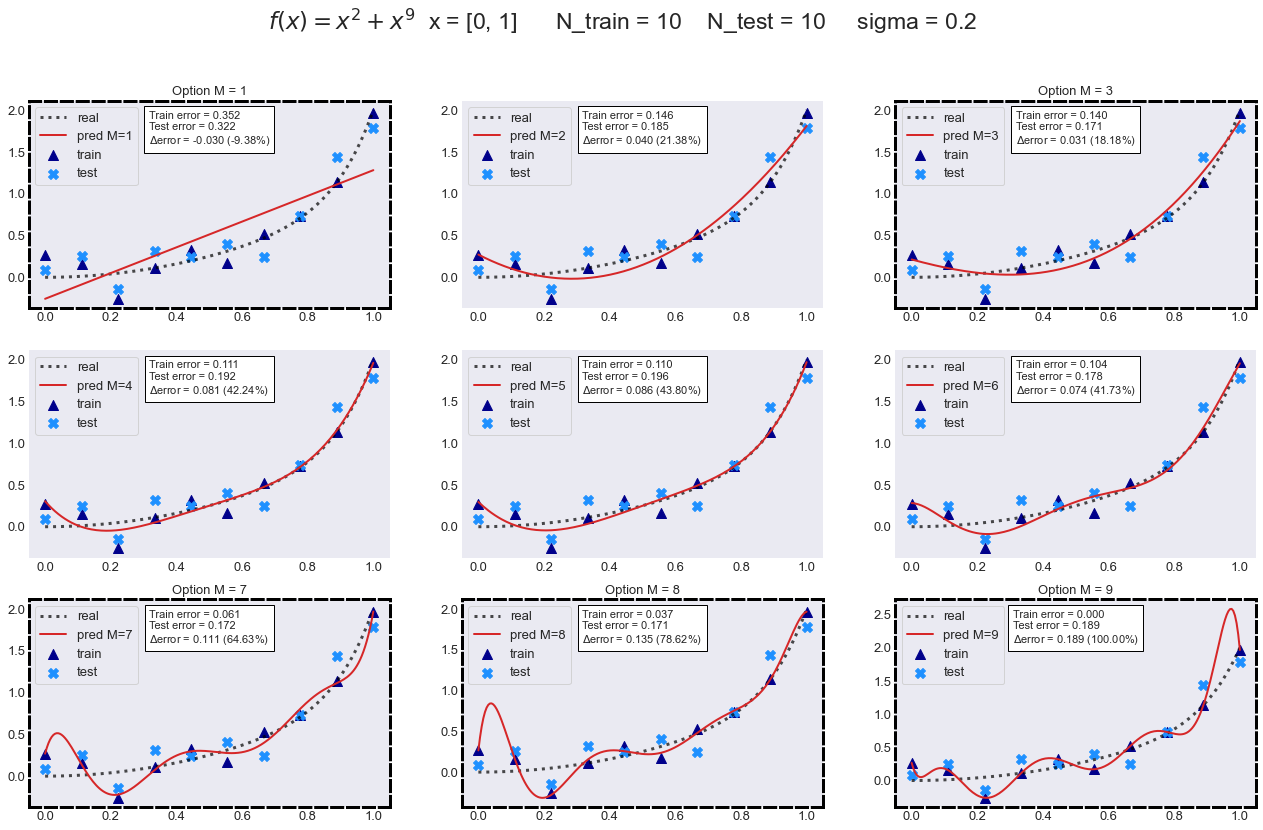

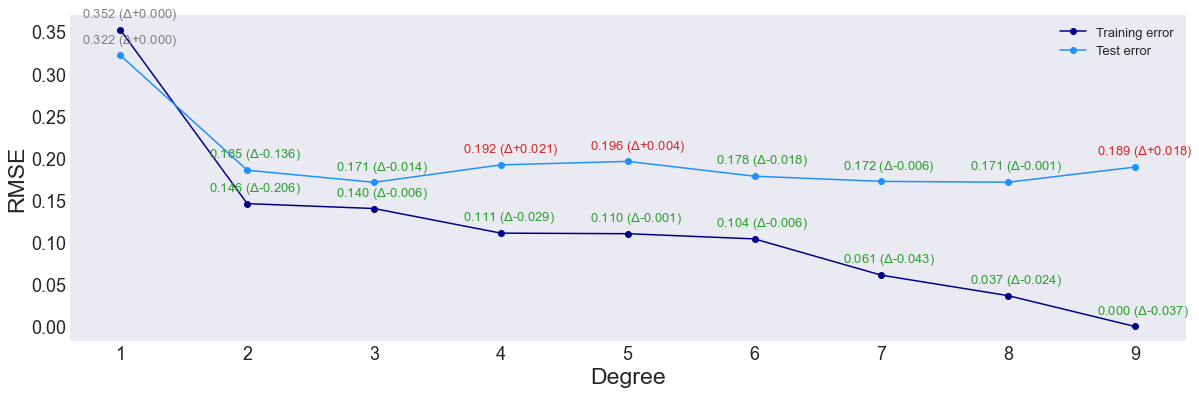

In [9]:

xplot = np.linspace(x_start, x_final,200)
xplot = xplot.reshape(len(xplot), 1)

cols = 3 # Numero de colunas para o Subplot
nrows, ncols = (math.ceil(len(m_values) / cols), cols) # Cálculo de rows e cols subplots deve ter

figs, axs = plt.subplots(nrows, ncols, figsize=(22,13)) # Cria subplot

# lista que armazena os erros de acordo com o grau do polinomio
training_errors = []
test_errors = []
degree = [] # armazena os graus do polinomio

for pos, M in enumerate(m_values):   
    # modelo a ser usado: regressão linear
    model = linear_model.LinearRegression()
    # transforma os dados para obter a matriz onde cada coluna i armazena x**i
    poly = PolynomialFeatures(degree=M) 
    X_train = poly.fit_transform(x_train)
    # realiza a regressão linear no conjunto de treinamento
    model.fit(X_train,y_train)
    Y_pred = model.predict(X_train)
    error_train = rmse(Y_pred,y_train)
    training_errors.append(error_train)

    # realiza a regressão linear no conjunto de teste
    X_test=poly.fit_transform(x_test)
    Y_pred2 = model.predict(X_test)
    error_test = rmse(Y_pred2, y_test)
    test_errors.append(error_test)
    degree.append(M)
    
    Xplot = poly.fit_transform(xplot)
    YPlot = model.predict(Xplot)

    # Plota cada subplot
    ax = axs[math.floor(pos / ncols)][pos % ncols]
    ax.plot(xt, yt, 'k:', label='real', alpha=0.7, lw=3)
    ax.plot(xplot, YPlot, label='pred M={}'.format(M), color = 'tab:red', lw=2)
    ax.scatter(x_train, y_train, marker='^', facecolor="darkblue", edgecolor="darkblue", s=100, label='train')
    ax.scatter(x_test, y_test, marker='X', facecolor="dodgerblue", edgecolor="dodgerblue", s=100, label='test')
   
    # Adiciona os textos com os erros no Gráfico
    ylim = ax.get_ylim()
    
    df = (ylim[1] - ylim[0])/15
    start = ylim[1] - 4*df
    string1 = 'Train error = {:.3f}'.format(error_train)
    string2 = 'Test error = {:.3f}'.format(error_test)
    string3 = '$\Delta$error = {:.3f} ({:.2%})'.format(error_test - error_train, (error_test - error_train)/error_test)
    string = "\n".join([string1, string2, string3])
    ob = offsetbox.AnchoredText(string, loc=9, prop=dict(fontsize=FONTSIZE-2))
    ax.add_artist(ob)
#     ax.text(0.35,start, string, fontsize=FONTSIZE)
    ax.legend(fontsize=FONTSIZE, loc=2, frameon=True)
    ax.tick_params(axis='x', labelsize= FONTSIZE)
    ax.tick_params(axis='y', labelsize= FONTSIZE)
    # Adiciona diferença no subplot que queremos marcar
    if M in m_options:
        ax.title.set_text(f'Option M = {M}')
        ax.title.set_fontsize(FONTSIZE)
#         ax.tick_params(color='tab:green', labelcolor='tab:green')
        for spine in ax.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(3)
            spine.set_linestyle('--')

# Figura com os erros
fig = plt.figure(figsize=(20, 6))
plt.plot(degree, training_errors, '-o', color="darkblue", label = 'Training error')
plt.plot(degree, test_errors, '-o', color="dodgerblue", label= 'Test error')
plt.xlabel("Degree", fontsize = FONTSIZE)
plt.ylabel("RMSE", fontsize = FONTSIZE)

plt.legend(fontsize = FONTSIZE)
plt.xlabel("Degree", fontsize = FONTSIZE + 10)
plt.ylabel("RMSE", fontsize = FONTSIZE + 10)
plt.xticks(fontsize = FONTSIZE + 5)
plt.yticks(fontsize = FONTSIZE + 5)
annotate_plot(fig.axes, degree, training_errors)
annotate_plot(fig.axes, degree, test_errors)
figs.suptitle(title_sub_plots, fontsize=FONTSIZE+10)

save_fig_opts = dict(bbox_inches = 'tight', pad_inches = 0.3)
figs.savefig('plots_com_M.png', **save_fig_opts)
fig.savefig('RMSE.png', **save_fig_opts)